<div class="alert alert-block alert-success">
<b>to do:</b>
    <BR> &#9730; Data description as appendix?
    <BR> &#9730; something with sunburst?
    <BR> &#9730; Add explenations for every step
    <BR> &#9730; Add theoretical background on every model 
    <BR> &#9730; use sns.pairplot?
</div>

# Links & refs

Main:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


preprocessing, , heatmap, PCA, submission:
https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices

Ensemble:
https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition


https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

submission example: 
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

Missing Data refference from: 
https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

heatmap:
https://stackoverflow.com/questions/66171071/how-to-restrict-a-correlation-heatmap-to-interesting-cells-and-add-stars-to-mark

https://stackoverflow.com/questions/71350386/how-to-change-the-font-labels-of-heatmap

outliers:
https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff

https://chat.openai.com/chat

https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

https://realpython.com/python-enumerate/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

<div class="alert alert-block alert-info">
<b>Final Project For Course 236502001 - כלים טכנולוגיות קוד פתוח למערכות תבוניות </b>
        <BR>Presented By:
        <BR>&emsp;1. Tali Presaizen 123456789
        <BR>&emsp;2. Mor Atiya 123456789
        <BR>&emsp;3. Amir Yorav 123456789
    <BR>Kaggle user: <a href=”https://www.google.com">KKK</a></div>

 # Table of Contents  
1. [Introduction](#Introduction)   
    1. [Data Set Description](#Data-Set-Description)  
    1. [Variable Description](#Variable-Description) 
1. [Imports](#All-Imports) 
1. [Exploring The Data](#Exploring-The-Data) 
    1. [Loading](#Loading) 
    1. [Missing Values](#Missing-Values)
    1. [Variable Correlations](#Variable-Correlations)
    1. [Target Variable](#Target-Variable)
    1. [Outliers](#Outliers)
1. [Prepering Data for models](#Prepering-Data-for-models)     
    1. [Encoding](#Encoding)
    1. [Splitting the Data](#Splitting-the-Data)   
    1. [Feature Scaling](#Feature-Scaling) 
1. [Feature Selection](#-Feature-Selection)
    1. [Ridge-Lasso-Elasticnet](#Ridge-Lasso-Elasticnet) 
    1. [Trees](#Trees) 
    1. [PCA](#PCA)
1. [SGD Model](#SGD-Model)     
    1. [Tune Hyper Parameters](#SGD---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#SGD---Evaluating-on-Validation-set)
    1. [Model Submission](#SGD---Model-Submission)     
1. [Random Forest Model](#Random-Forest-Model)     
    1. [Tune Hyper Parameters](#RF---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#RF---Evaluating-on-Validation-set)     
    1. [Model Submission](#RF-Model-Submission) 
1. [Model TTT](#Model-TTT)     
    1. [Tune Hyper Parameters](#TM---Tune-Hyper-Parameters)   
    1. [Evaluating on Validation set](#TM---Evaluating-on-Validation-set)     
    1. [Submission](#TM---Submission) 
1. [Ensemble of the Models](#Ensemble-of-the-Models)     
    1. [Create Ensemble](#Create-Ensemble)    
    1. [Evaluating on Validation set](#Evaluating-on-Validation-set)     
1. [Final Submission](#Conclusions) 
1. [Conclusions](#Conclusions) 
1. [References](#References)    

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Introduction

### Data Set Description

# Variable Description

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
## All Imports 

In [441]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# define plt settings
plt.rcParams["font.size"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold

#for some statistics
from scipy.stats import uniform
from scipy import stats
from scipy.stats import norm, skew 

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Exploring The Data

### Loading

In [402]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [403]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [404]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<div class="alert alert-block alert-success">
We see test have all the columns except the <strong>'SalePrice'</strong> which is our target
</div>

In [405]:
#removing 'Id' column which is just the DB table index
train_data = train_data.drop('Id',axis=1) 
test_data = test_data.drop('Id',axis=1) 

In [406]:
# concat all data so we can make all the preprocessing on all
target = train_data['SalePrice']
all_data = pd.concat([train_data.drop('SalePrice',axis=1), test_data])

In [407]:
all_data.shape

(2919, 79)

---

 #### visual reports

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz("", depVar='SalePrice', dfte=train_data, verbose=2)

 Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
       verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.

import sweetviz as sv
analyze_report = sv.analyze(train_data)
analyze_report.show_html()

---

In [408]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [409]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

### Missing Values

In [410]:
# find missing data percentage for each column
def find_missing(df):
    df_na =(df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_df = pd.DataFrame({'Missing Data' :df_na})
    return missing_df

In [411]:
na_data = find_missing(all_data)
na_data

,Missing Data
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

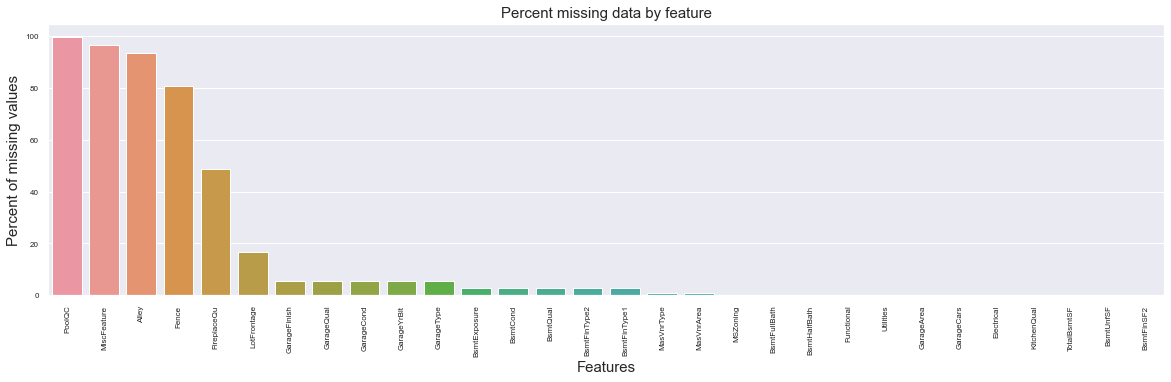

In [412]:
f, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation='90')
sns.barplot(x=na_data.index, y=na_data['Missing Data'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

In [413]:
#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
#Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")
#Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")
#FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)
#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [414]:
missing = find_missing(all_data)
missing

,Missing Data


<div class="alert alert-block alert-success">
No missing data left!
</div>

### Variable Correlations

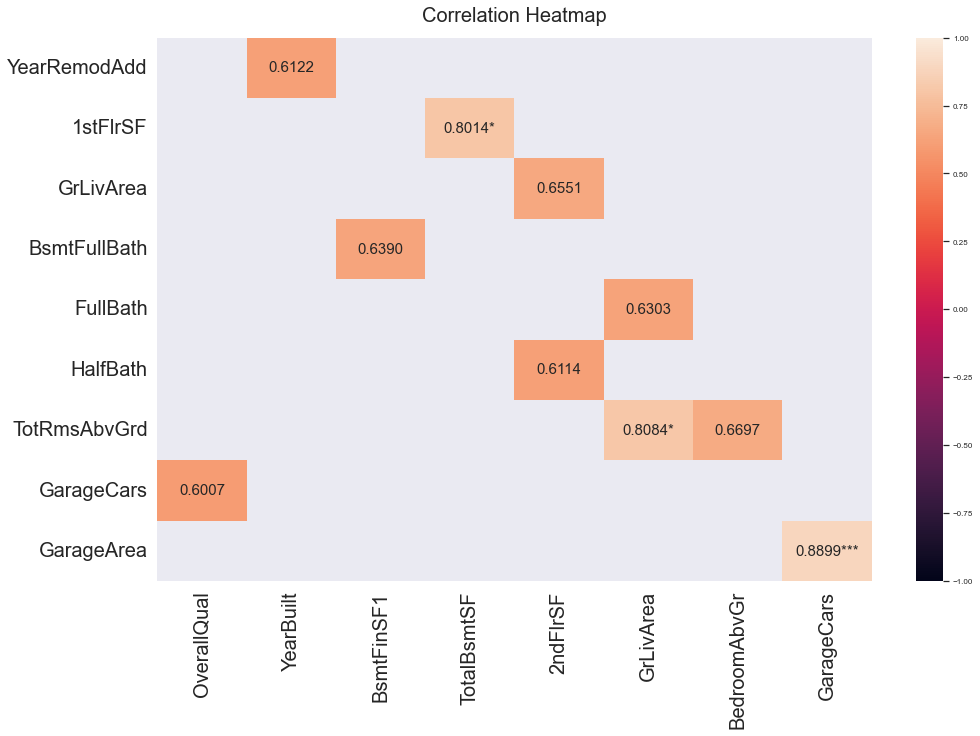

In [415]:
plt.figure(figsize=(16, 10))
corr = all_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.6  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '*')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '**')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '***')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', annot_kws={"fontsize":15})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 20}, pad=16)
plt.xticks(rotation=90, fontsize=20) 
plt.yticks(rotation=0, fontsize=20) 
plt.show()

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

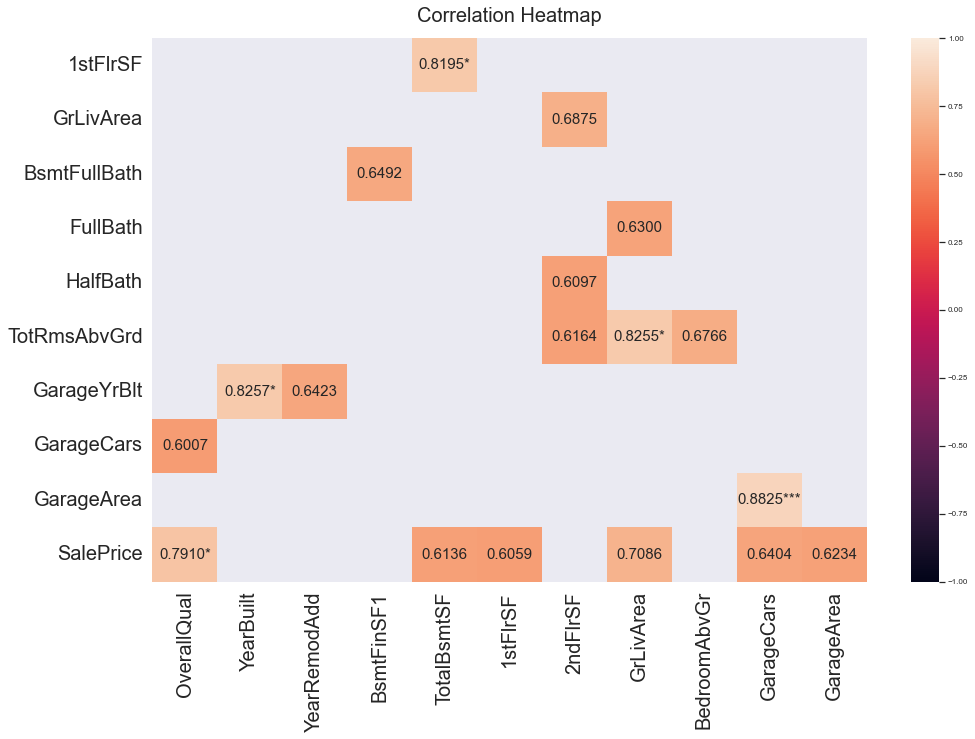

In [416]:
plt.figure(figsize=(16, 10))
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.6  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '*')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '**')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '***')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', annot_kws={"fontsize":15})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 20}, pad=16)
plt.xticks(rotation=90, fontsize=20) 
plt.yticks(rotation=0, fontsize=20) 
plt.show()

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

### Target Variable

In [417]:
# plot the target distribution
def plot_hist(data):
    plt.figure(figsize=(16, 5))
    sns.histplot(data);
    (mu, sigma) = norm.fit(data) # Get the fitted parameters used by the function
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    fig = plt.figure()
    plt.figure(figsize=(16, 5))
    res = stats.probplot(data, plot=plt)
    plt.show()


 mu = 180921.20 and sigma = 79415.29



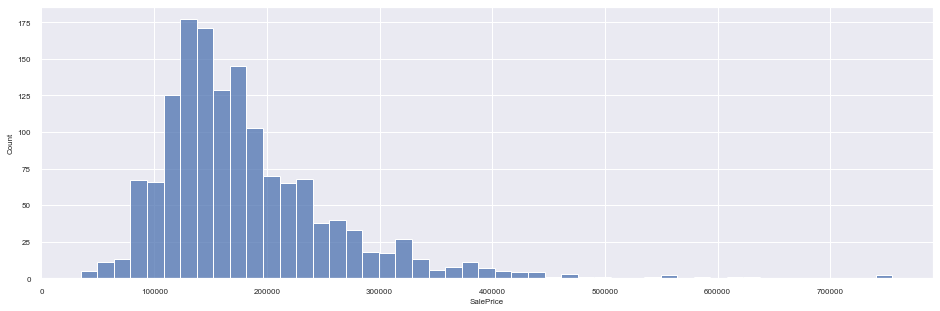

<Figure size 432x288 with 0 Axes>

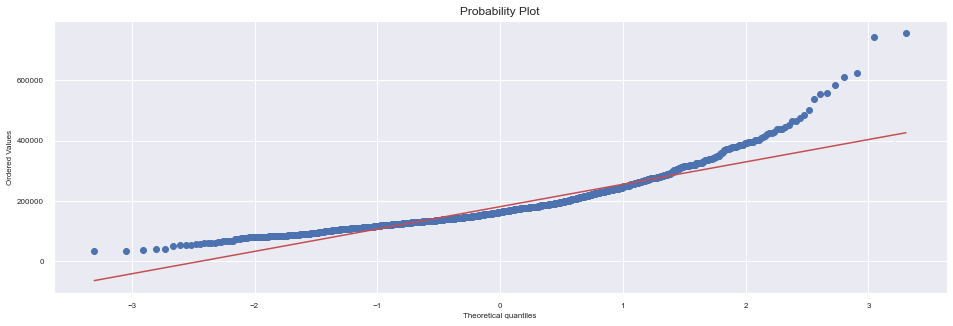

In [418]:
plot_hist(target)

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

In [419]:
target = np.log1p(target)


 mu = 12.02 and sigma = 0.40



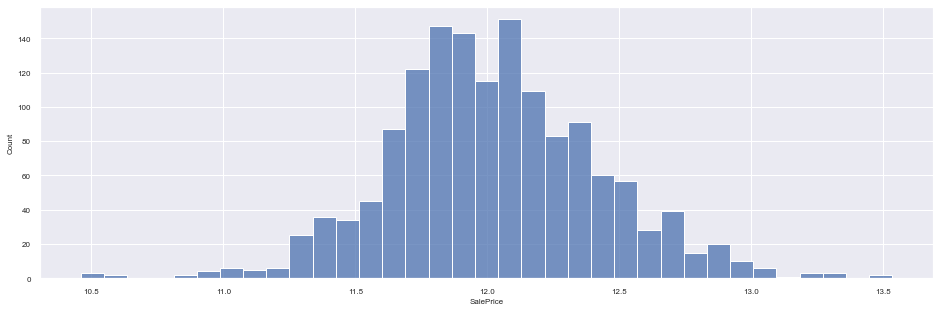

<Figure size 432x288 with 0 Axes>

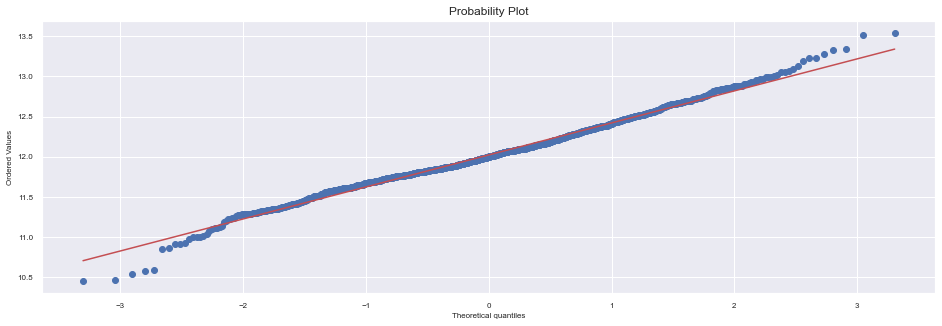

In [420]:
plot_hist(target)

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

#### SalePrice against OverallQual

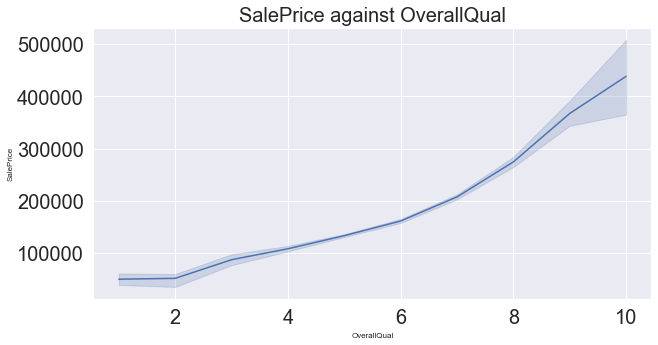

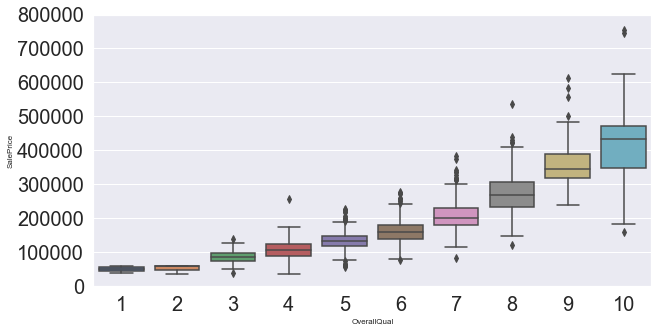

In [421]:
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = 'OverallQual', y = 'SalePrice', data = train_data)
plt.title("SalePrice against OverallQual", fontdict={'fontsize': 20})
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.show()

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

In [422]:
# plot_corr_predictors
def plot_corr_predictors(predictor_names):
    plt.figure(figsize=(20,10))
    
    for count, predictor in enumerate(corr_predictors, start=1):
        plt.subplot(2,3,count)
        ax = sns.scatterplot(x = predictor, y = 'SalePrice', data = train_data)
        plt.title("SalePrice against " + predictor, fontdict={'fontsize': 20})

    plt.tight_layout(pad=4.0)
    plt.show()    

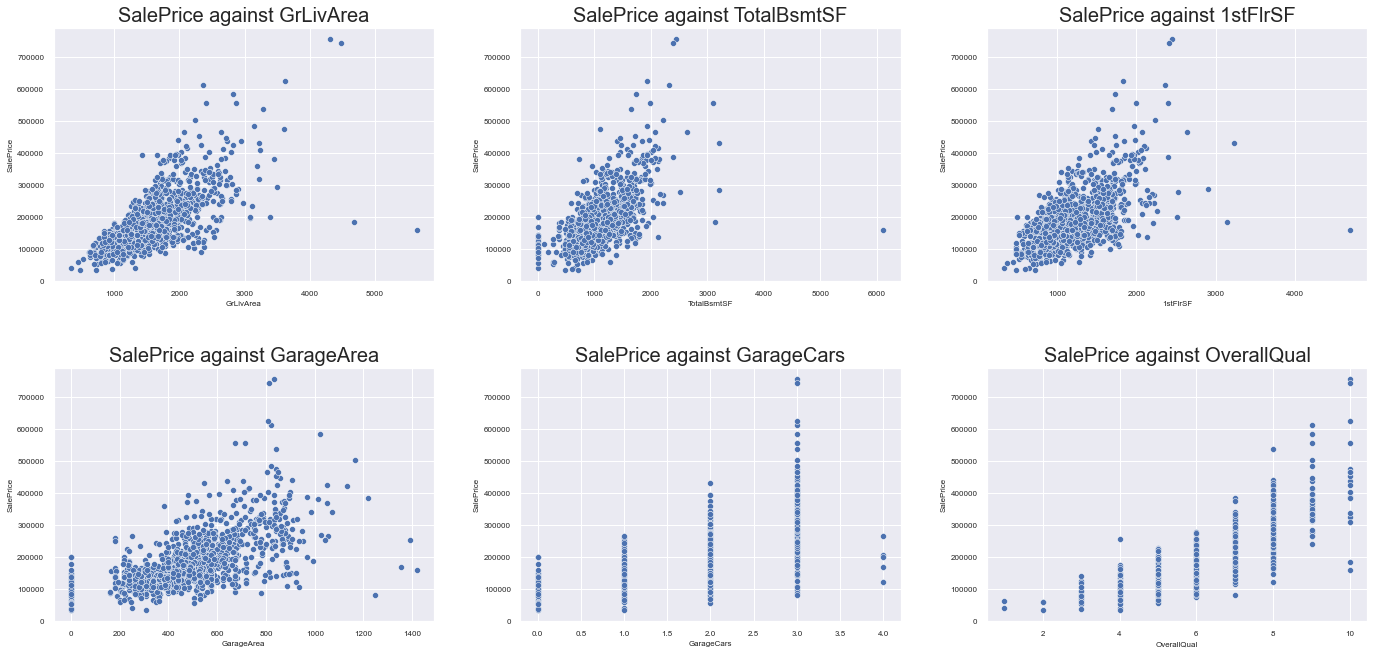

In [423]:
corr_predictors = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'OverallQual']
plot_corr_predictors(corr_predictors)

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

### Outliers

In [424]:
# GrLivArea
idxs_GrLivArea = list(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)
# TotalBsmtSF
idxs_TotalBsmtSF = list(train_data[(train_data['TotalBsmtSF']>4000) & (train_data['SalePrice']<300000)].index)
# 1stFlrSF
idxs_1stFlrSF = list(train_data[(train_data['1stFlrSF']>4000) & (train_data['SalePrice']<300000)].index)
# TotalBsmtSF
idxs_TotalBsmtSF = list(train_data[(train_data['GarageArea']>1200) & (train_data['SalePrice']<300000)].index)

In [425]:
out_idxs = list(set(idxs_GrLivArea + idxs_TotalBsmtSF + idxs_1stFlrSF + idxs_TotalBsmtSF))
out_idxs

[1061, 581, 1190, 523, 1298]

In [426]:
train_data = train_data.drop(out_idxs)
target = target.drop(out_idxs) 

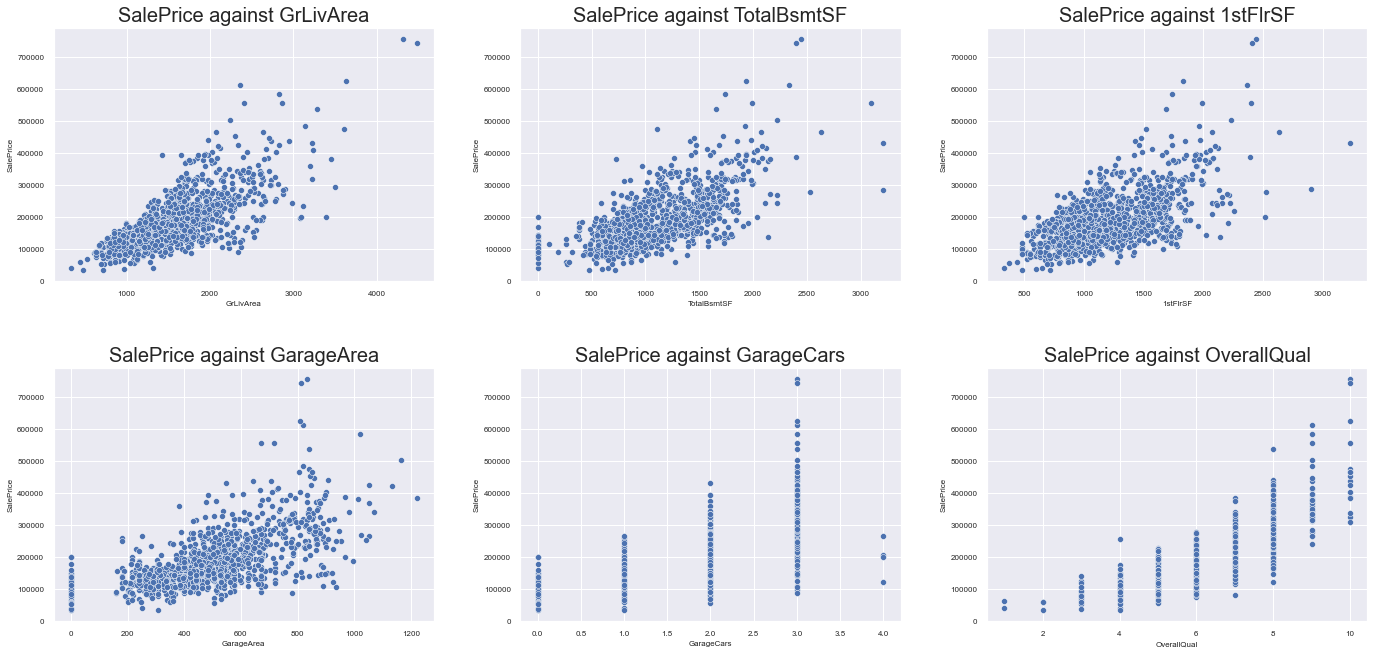

In [427]:
plot_corr_predictors(corr_predictors)

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Prepering Data for models

### Feature Scaling

In [428]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x
 .

Note that setting  λ=0
  is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page

In [429]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 36 skewed numerical features to Box Cox transform


### Encoding

In [430]:
# Transforming some numerical variables that are really categorical
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [431]:
# Label Encoding some categorical variables that may contain information in their ordering set
#from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [432]:
#Adding one more important feature
#Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [433]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


### Splitting the data

In [434]:
ntrain = train_data.shape[0]
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape, test.shape)

(1455, 221) (1464, 221)


<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# -Feature Selection

### Ridge-Lasso-Elasticnet

### Trees

In [440]:
train

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,5.831328,19.212182,1,1,3,0,2.440268,4,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,0,6.221214,19.712205,1,1,3,0,2.259674,7,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,5,5.914940,20.347241,1,1,0,0,2.440268,4,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,6,5.684507,19.691553,1,1,0,0,2.440268,4,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,5,6.314735,21.325160,1,1,0,0,2.602594,4,14.182841,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,10,5.684507,19.458096,1,1,3,0,2.055642,4,14.141979,...,0,0,0,1,0,0,0,0,1,0
1451,0,6.172972,19.570775,1,1,3,0,2.602594,4,14.195323,...,0,1,0,0,0,0,0,0,0,1
1452,14,4.745132,16.174331,1,1,3,0,2.055642,4,14.190647,...,0,0,0,1,0,0,0,0,1,0
1453,0,6.448232,22.127608,1,1,3,0,2.055642,4,14.192207,...,0,0,0,1,1,0,0,0,0,0


<AxesSubplot:>

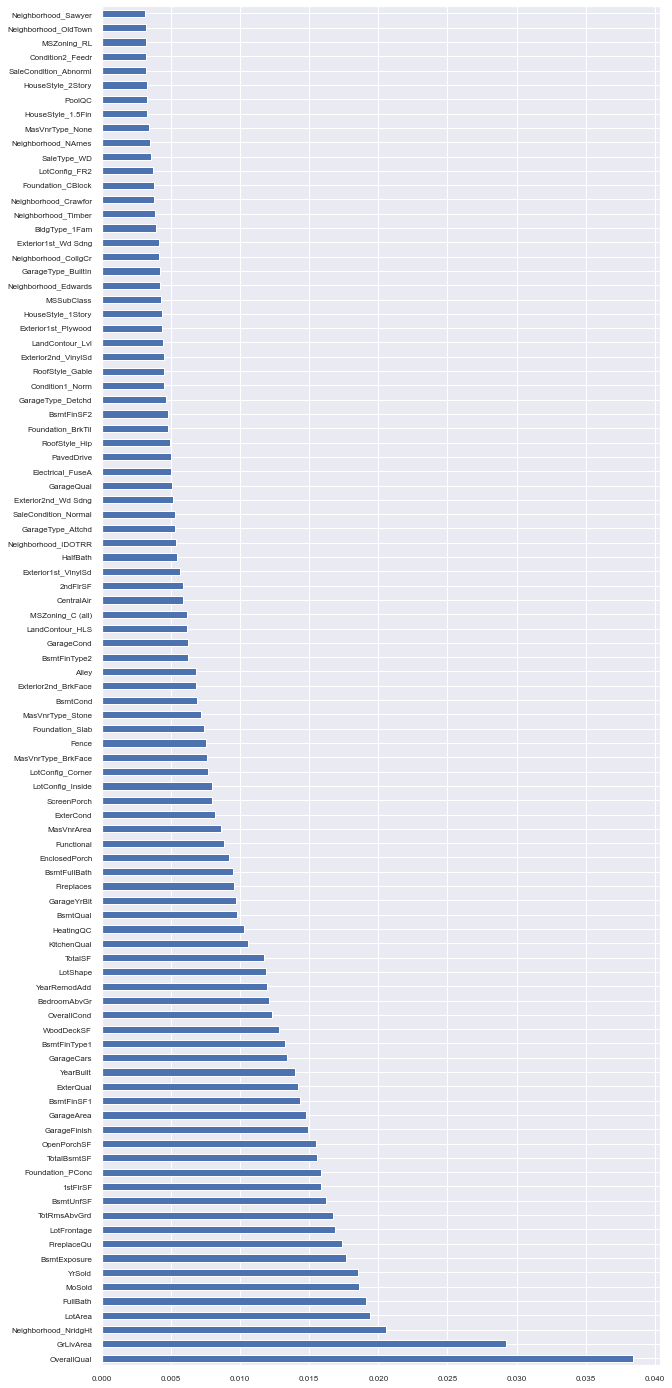

In [442]:
model = ExtraTreesRegressor()
model.fit(train,target)
plt.figure(figsize=(10, 25))
feature_rank = pd.Series(model.feature_importances_, index = train.columns)
feature_rank.nlargest(95).plot(kind = "barh")

In [443]:
feature_rank_pd = pd.DataFrame(feature_rank)
feature_rank_pd.describe()

,0
count,221.000000
mean,0.004525
std,0.005669
min,0.000000
25%,0.000789
50%,0.002597
75%,0.005686
max,0.038431


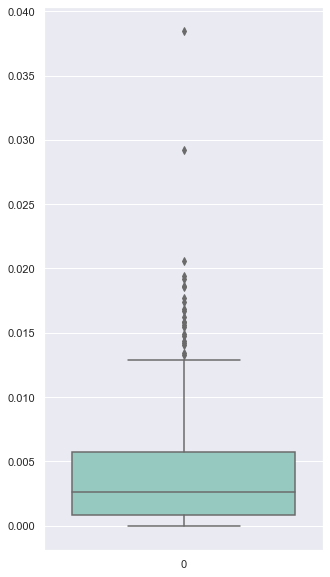

In [447]:
plt.figure(figsize=(5,10))
sns.boxplot(data=feature_rank_pd,palette="Set3")
plt.show()

### PCA

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# SGD Model

### SGD - Tune Hyper Parameters

### SGD - Evaluating on Validation set

### SGD - Model Submission 

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Random Forest Model

### RF - Tune Hyper Parameters

### RF - Evaluating on Validation set

### RF - Model Submission

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Model TTT

### TM - Tune Hyper Parameters

### TM - Evaluating on Validation set 

### TM - Submission

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Ensemble of the Models

### Create Ensemble

### Evaluating on Validation set

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Final Submission

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# Conclusions

<a href="#Table-of-Contents"><img src="top.png" width="50" height="50" align="right"></a>
# References